In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [30]:
a = open('A_Thermal_5.bin')
a.close

<function TextIOWrapper.close()>

In [31]:
print(a)

<_io.TextIOWrapper name='A_Thermal_5.bin' mode='r' encoding='utf-8'>


In [32]:
import matplotlib.pyplot as plt

In [35]:
a

<_io.TextIOWrapper name='A_Thermal_5.bin' mode='r' encoding='utf-8'>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit   # as an example for importing curve_fit function

# First: Define functions
#
# load_image: function which loads image file and returns content as a
# matrix / array (numpy array). The resulting data is the ratio of the 
# intensity with atoms divided by the intensity without atoms:
# imageData(x,y)=I(x,y)/I_0(x,y)

def load_image(filename, size_x, size_y):
    with open(filename, 'rb') as fid:
        imageData = np.fromfile(fid, np.float32).reshape(size_x, size_y).T
        return imageData

# Define parameters
myfilename='A_Thermal_5.bin'
resolution_x=300   # number of pixels in x direction
resolution_y=1000  # number of pixels in y direction

# Now load the data from one image
data = load_image(myfilename,resolution_x,resolution_y)

# output the picture on the screen

#plt.imshow(data)
#plt.show()

# Now you can do fitting. For 1D / 2D fitting in python, a typical function 
# that people use is curve_fit() from the scipy package (see import section, above)


In [6]:
imageData5 = data = load_image('A_Thermal_5.bin',300,1000)

In [7]:
ny,nx = imageData5.shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
X_flat = X.ravel()
Y_flat = Y.ravel()
Z = imageData5.ravel()
nx

300

In [8]:
def gaussian_1d(coords, A, x0, sigma_x, offset):
    x =coords
    mu_x = (x - x0)
    exp_term = np.exp(-((mu_x**2) / (2 * sigma_x**2) ))
    return A * exp_term + offset

In [9]:
x = np.arange(300000)
x

array([     0,      1,      2, ..., 299997, 299998, 299999])

In [10]:
imageData5 = data = load_image('A_Thermal_5.bin',300,1000)
ny,nx = imageData5.shape
x = np.arange(300000)
Z = imageData5.ravel()

In [11]:
popt, pcov = curve_fit(gaussian_1d,x, Z)
popt

array([ 0.93907793, -7.51027982,  2.9268962 ,  0.99098691])

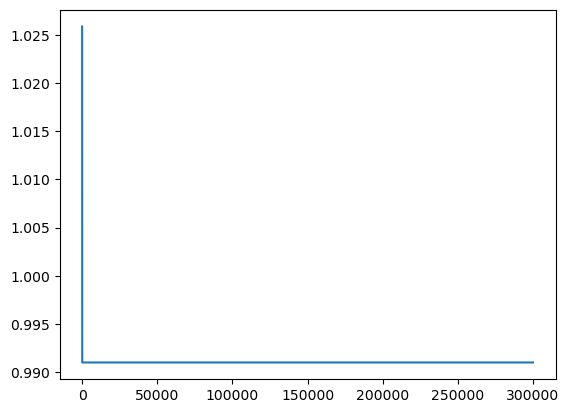

In [12]:
result = gaussian_1d(x,*popt)
plt.plot(result)

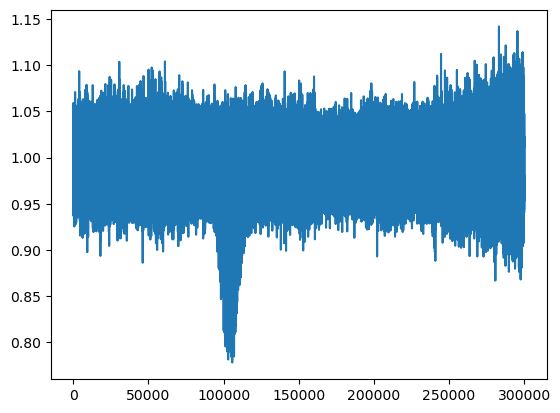

In [13]:
plt.plot(Z)

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
imageData5 = data = load_image('A_Thermal_5.bin',1000,300)
# Example 2D Gaussian function
def gaussian_2d(coords, A, x0, y0, sigma_x, sigma_y, theta, offset):
    x, y = coords
    x_rot = (x - x0) * np.cos(theta) + (y - y0) * np.sin(theta)
    y_rot = -(x - x0) * np.sin(theta) + (y - y0) * np.cos(theta)
    exp_term = np.exp(-((x_rot**2) / (2 * sigma_x**2) + (y_rot**2) / (2 * sigma_y**2)))
    return A * exp_term + offset

# Generate example data (replace with your 2D matrix)
nx,ny = imageData5.shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

X_flat = X.ravel()
Y_flat = Y.ravel()
Z = imageData5.ravel()
#Z = Z.T

# Fit data
#initial_guess = (np.max(Z_flat),nx//2,ny//2,10,10,np.min(Z_flat)) # Initial parameter guesses
popt, pcov = curve_fit(gaussian_2d, (X_flat, Y_flat), Z_flat, p0=None )

# Extract fit results
A, x0, y0, sigma_x, sigma_y, theta, offset = popt
print("Fitted parameters:")
print(f"A = {A}, x0 = {x0}, y0 = {y0}, sigma_x = {sigma_x}, sigma_y = {sigma_y}, theta = {theta}, offset = {offset}")

# Plot the fit
Z_fit = gaussian_2d((X, Y), *popt).reshape(X.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#ax[0].imshow(Z_noisy, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
#ax[0].set_title('Noisy Data')
ax[1].imshow(Z_fit, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis')
ax[1].set_title('Fitted 2D Gaussian')
plt.show()


NameError: name 'Z_flat' is not defined

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

sigma_abs = 29e-13  
pixel_size = 3.68e-6  

# Define 2D Gaussian function
def gaussian_2d( coords, A, x0, y0, sigma_x, sigma_y, theta, offset):
    x, y = coords
    x_rot = (x - x0) * np.cos(theta) + (y - y0) * np.sin(theta)
    y_rot = -(x - x0) * np.sin(theta) + (y - y0) * np.cos(theta)
    exp_term = np.exp(-((x_rot**2) / (2 * sigma_x**2) + (y_rot**2) / (2 * sigma_y**2)))
    return A * exp_term + offset

# Load 2D image data (replace with your actual image data)
image_data = load_image('A_Thermal_5.bin', resolution_x, resolution_y)  # Example placeholder
ny, nx = image_data.shape  # Image dimensions
column_density = -np.log(image_data ) / sigma_abs
# Create coordinate grids
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)

# Flatten data for fitting
X_flat = X.ravel()
Y_flat = Y.ravel()
Z_flat = column_density.ravel()

#Provide initial guesses for the parameters
initial_guess = (np.max(Z_flat), nx // 2, ny // 2, 10, 10, 0, np.min(Z_flat))

# Perform the fit
popt, pcov = curve_fit(gaussian_2d, (X_flat, Y_flat), Z_flat, p0=initial_guess )

# Extract fitted parameters
A, x0, y0, sigma_x, sigma_y, theta, offset = popt
print("Fitted parameters:")
print(f"A = {A}, x0 = {x0}, y0 = {y0}, sigma_x = {sigma_x}, sigma_y = {sigma_y}, theta = {theta}, offset = {offset}")

# Generate fitted Gaussian
Z_fit = gaussian_2d((X, Y), *popt).reshape(ny, nx)

# Plot original data and fitted Gaussian
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_data, cmap='viridis', origin='lower')
ax[0].set_title('Original Data')
ax[1].imshow(Z_fit, cmap='viridis', origin='lower')
ax[1].set_title('Fitted 2D Gaussian')
plt.show()


In [ ]:
pip install tensorflow

In [ ]:

imdata =[]
for i in range(1,12):
    t = 'A_Thermal_'+ str(i) +'.bin'
    data = load_image(t,resolution_x,resolution_y)
    
    imdata.append(data)
for i,im in enumerate(data):
    plt.figure()
    i,im = plt.subplots(1, 11, figsize=(20, 2))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

imdata = []  

for i in range(1, 12):
    t = f'A_Thermal_{i}.bin'  
    data = load_image(t, resolution_x, resolution_y) 
    imdata.append(data)  # Append to the list

# Plot images
fig, axes = plt.subplots(1, 11, figsize=(10, 10)) 

for i, (ax, im) in enumerate(zip(axes, imdata)):  
    ax.imshow(im)  
    ax.axis('off') 
    ax.set_title(f"Image {i+1}", fontsize=8)  # Optional: Add titles


plt.show()  # Display the figure


In [ ]:
data[0]

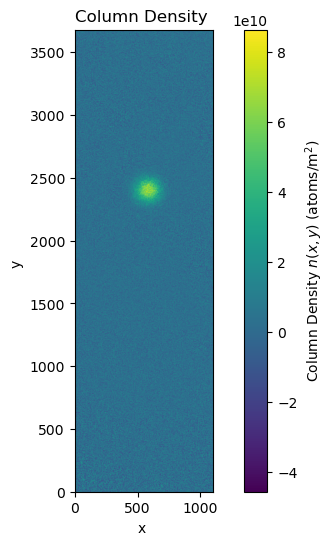

In [15]:

sigma_abs = 29e-13  
pixel_size = 3.68e-6  

transmitted_image = load_image('A_Thermal_5.bin', resolution_x, resolution_y)


#ratio = (transmitted_image ) / (reference_image + epsilon)
column_density = -np.log(transmitted_image ) / sigma_abs

# Plot the column density as a 2D image
plt.figure(figsize=(8, 6))
plt.imshow(column_density, cmap='viridis', extent=[0, column_density.shape[1] * pixel_size * 1e6,
                                                   0, column_density.shape[0] * pixel_size * 1e6])
plt.colorbar(label=r'Column Density $n(x, y)$ (atoms/m$^2$)')
plt.xlabel('x ')
plt.ylabel('y ')
plt.title('Column Density ')
plt.show()


In [16]:
nx = (imageData5)
len(nx)

300

In [17]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the 1D Gaussian function
def gaussian_1d(x, A, x0, sigma, offset):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

# Generate synthetic data (replace this with your actual data if available)
x = np.arange(len(nx))  # 200 points between 0 and 100
imageData5 = load_image('A_Thermal_11.bin', resolution_x, resolution_y)
column_density = -np.log(imageData5 ) / sigma_abs
y_noisy = y_true = np.sum(column_density,axis = 1)


# Fit the noisy data to the Gaussian model
initial_guess = [(np.max(y_true)-np.min(y_true)), np.mean(x), np.std(x), np.min(y_true)]  # Initial guesses for A, x0, sigma, offset
popt, pcov = curve_fit(gaussian_1d, x, y_true, p0=initial_guess)

# Extract fitted parameters
A_fit, x0_fit, sigma_fit, offset_fit = popt
print("Fitted parameters:")
print(f"A = {A_fit:.2f}, x0 = {x0_fit:.2f}, sigma = {sigma_fit:.2f}, offset = {offset_fit:.2f}")
#print('A_fit, x0_fit, sigma_fit, offset_fit')
#print(*popt)
# Generate the fitted Gaussian curve
y_fit = gaussian_1d(x, *popt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, '.', label='true Data', markersize=5)
#plt.plot(x, y_true, 'k--', label='True Gaussian', linewidth=0.2)
plt.plot(x, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
plt.xlabel('vertical position')
plt.ylabel('number of atoms')
plt.title('1D Gaussian Fit')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (300,) (1000,) 

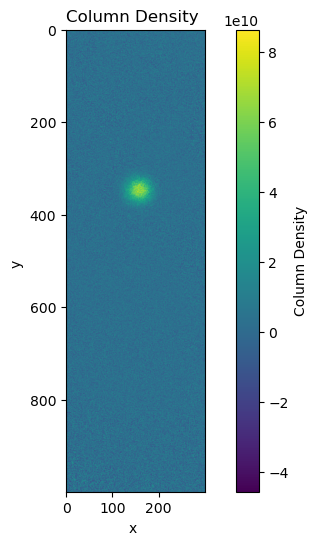

In [18]:
sigma_abs = 29e-13  
pixel_size = 3.68e-6  

transmitted_image = load_image('A_Thermal_5.bin', resolution_x, resolution_y)


#ratio = (transmitted_image ) / (reference_image + epsilon)
column_density = -np.log(transmitted_image ) / sigma_abs

# Plot the column density as a 2D image
plt.figure(figsize=(8, 6))
plt.imshow(column_density )
plt.colorbar(label='Column Density')
plt.xlabel('x ')
plt.ylabel('y ')
plt.title('Column Density ')
plt.show()


Fitted parameters:
A = 2989903161719.35, x0 = 347.66, sigma = 17.64, offset = 835667457288.79


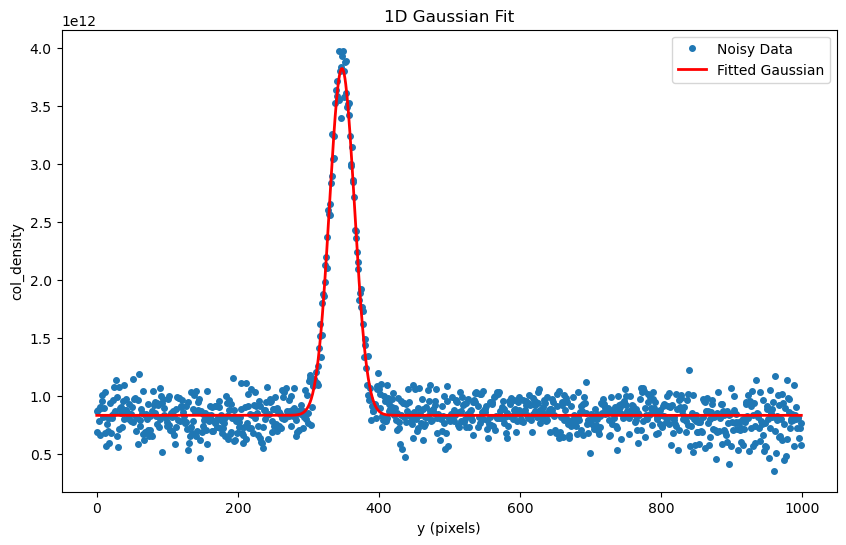

In [19]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
sigma_abs = 29e-13  
# Define the 1D Gaussian function
def gaussian_1d(x, A, x0, sigma, offset):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

# Load image data
imageData = load_image('A_Thermal_5.bin', resolution_x, resolution_y)
column_density = -np.log(imageData ) / sigma_abs
# Summing along one axis to create 1D data (vertical or horizontal sum)
y_noisy = np.sum(column_density, axis=1)  # Sum along rows (collapse y-dimension)

# Generate x-coordinates
x = np.arange(len(y_noisy))

# Initial guesses for Gaussian parameters (adapt based on your data range)
A_guess = np.max(y_noisy) - np.min(y_noisy)
x0_guess = np.argmax(y_noisy)  # Position of maximum intensity
sigma_guess = len(y_noisy) / 10  # Rough estimate of spread
offset_guess = np.min(y_noisy)
initial_guess = [A_guess, x0_guess, sigma_guess, offset_guess]

# Fit the noisy data to the Gaussian model
popt, pcov = curve_fit(gaussian_1d, x, y_noisy, p0=initial_guess)

# Extract fitted parameters
A_fit, x0_fit, sigma_fit, offset_fit = popt
print("Fitted parameters:")
print(f"A = {A_fit:.2f}, x0 = {x0_fit:.2f}, sigma = {sigma_fit:.2f}, offset = {offset_fit:.2f}")

# Generate the fitted Gaussian curve
ax1fit =y_fit = gaussian_1d(x, *popt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, 'o', label='Noisy Data', markersize=4)
plt.plot(x, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
plt.xlabel('y (pixels)')
plt.ylabel('col_density')
plt.title('1D Gaussian Fit')
plt.legend()
plt.show()


Fitted parameters:
A = 2952303891202.90, x0 = 158.00, sigma = 19.00, offset = 2757691790156.21


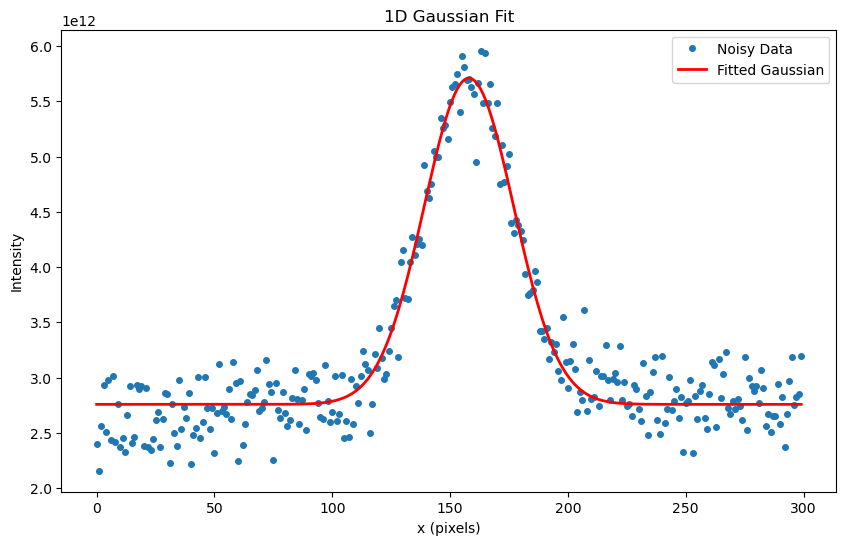

In [20]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
sigma_abs = 29e-13  
# Define the 1D Gaussian function
def gaussian_1d(x, A, x0, sigma, offset):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

# Load image data
imageData = load_image('A_Thermal_5.bin', resolution_x, resolution_y)
column_density = -np.log(imageData ) / sigma_abs
# Summing along one axis to create 1D data (vertical or horizontal sum)
y_noisy = np.sum(column_density, axis=0)  # Sum along rows (collapse y-dimension)

# Generate x-coordinates
x = np.arange(len(y_noisy))

# Initial guesses for Gaussian parameters (adapt based on your data range)
A_guess = np.max(y_noisy) - np.min(y_noisy)
x0_guess = np.argmax(y_noisy)  # Position of maximum intensity
sigma_guess = len(y_noisy) / 10  # Rough estimate of spread
offset_guess = np.min(y_noisy)
initial_guess = [A_guess, x0_guess, sigma_guess, offset_guess]

# Fit the noisy data to the Gaussian model
popt, pcov = curve_fit(gaussian_1d, x, y_noisy, p0=initial_guess)

# Extract fitted parameters
A_fit, x0_fit, sigma_fit, offset_fit = popt
print("Fitted parameters:")
print(f"A = {A_fit:.2f}, x0 = {x0_fit:.2f}, sigma = {sigma_fit:.2f}, offset = {offset_fit:.2f}")

# Generate the fitted Gaussian curve
ax0fit=y_fit = gaussian_1d(x, *popt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, 'o', label='Noisy Data', markersize=4)
plt.plot(x, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
plt.xlabel('x (pixels)')
plt.ylabel('Intensity')
plt.title('1D Gaussian Fit')
plt.legend()
plt.show()


In [21]:
im_data = []  

for i in range(1, 12):
    t = f'A_Thermal_{i}.bin'  
    data = load_image(t, resolution_x, resolution_y) 
    im_data.append(data) 
def gaussian_1d(x, A, x0, sigma, offset):
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset
def fit_fun(image_data):
    sigma_abs = 29e-13 
    column_density = -np.log(image_data ) / sigma_abs
    y_data = np.sum(column_density, axis=1)
    x = np.arange(len(y_data))
    A_guess = (np.max(y_data) - np.min(y_data))
    x0_guess = np.mean(x)
    sigma_guess = np.std(x)
    offset_guess = np.min(y_data)
    initial_guess = [A_guess, x0_guess, sigma_guess, offset_guess]
    popt, pcov = curve_fit(gaussian_1d, x, y_data, p0=initial_guess)
    return popt
    

In [22]:
idat= im_data[4]
popt = fit_fun(idat)
popt

array([ 2.98990317e+12,  3.47657501e+02, -1.76432615e+01,  8.35667458e+11])

In [27]:
optvar = []
for im in im_data:
    popt = fit_fun(im)
    optvar.append(popt)
    

optvar
    

[array([-3.58828764e+11,  7.72851405e+02,  2.60066755e+02,  1.18220517e+12]),
 array([ 5.84943354e+12,  2.32533057e+02, -8.87130116e+00,  7.42435151e+11]),
 array([4.25804608e+12, 2.60705175e+02, 1.17128201e+01, 8.40841274e+11]),
 array([3.57044930e+12, 2.99004515e+02, 1.44131569e+01, 1.03323407e+12]),
 array([ 2.98990317e+12,  3.47657501e+02, -1.76432615e+01,  8.35667458e+11]),
 array([2.46674415e+12, 4.06828035e+02, 2.09913493e+01, 9.21752389e+11]),
 array([ 2.21271457e+12,  4.75050760e+02, -2.41165400e+01,  7.69685634e+11]),
 array([ 2.06792416e+12,  5.54757071e+02, -2.75092040e+01,  7.86701913e+11]),
 array([ 1.73359181e+12,  6.44283359e+02, -3.08871689e+01,  8.61642586e+11]),
 array([ 1.32106711e+12,  7.42436556e+02, -3.36058891e+01,  7.66294892e+11]),
 array([1.31596748e+12, 8.53357389e+02, 3.66189558e+01, 9.14408869e+11])]

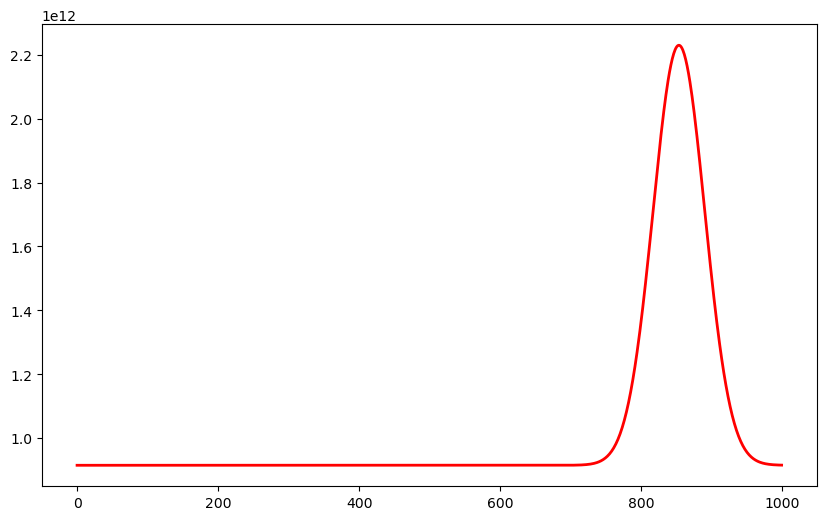

In [28]:
testvar = optvar[10]
x = np.arange(1000)
test_fit = gaussian_1d(x, *testvar)
plt.figure(figsize=(10, 6))
#plt.plot(x, y_noisy, 'o', label='Noisy Data', markersize=4)
plt.plot(x, test_fit, 'r-', label='Fitted Gaussian', linewidth=2)


In [135]:
def gaussian_2d(coords, A, x0, y0, sigma_x, sigma_y, offset):
    x,y = coords
        
    exp_term = np.exp(-(((x-x0)**2) / (2 * sigma_x**2) + ((y-y0)**2) / (2 * sigma_y**2)))
  
    return (A * exp_term + offset)

imageData = load_image('A_Thermal_1.bin', resolution_x, resolution_y)
col_density = -np.log(imageData ) / sigma_abs
true_val = col_density.ravel()
ny,nx = col_density.shape
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
coordinates = np.vstack([X.ravel(), Y.ravel()])


A_guess = (np.max(true_val) - np.min(true_val) )
x0_guess = np.mean(x)
y0_guess = np.mean(y)
sigmax_guess = np.std(x)
sigmay_guess = np.std(y)
offset_guess = np.min(true_val)

initial_guess = [A_guess, x0_guess,y0_guess, sigmax_guess, sigmay_guess, offset_guess]

popt,pcov = curve_fit(gaussian_2d, coordinates,true_val, p0 = initial_guess )


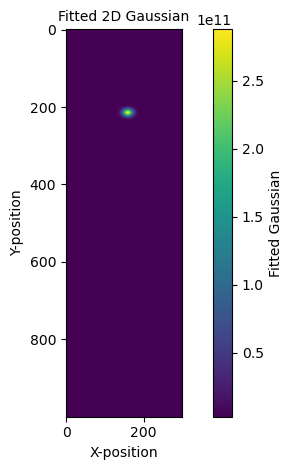

In [163]:
fitted_data = gaussian_2d(coordinates, *popt).reshape(ny, nx)

plt.imshow(fitted_data)
plt.colorbar(label="Fitted Gaussian" )
plt.title("Fitted 2D Gaussian", fontsize = 10)

plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.tight_layout()
plt.show()


In [75]:
coordinates = np.array([X, Y])

[array([ 2.85276133e+11,  1.57862402e+02,  2.14773430e+02,  9.26391897e+00,
       -6.68707786e+00,  2.94148076e+09]), array([ 2.11938814e+11,  1.57901110e+02,  2.32687858e+02,  1.09654232e+01,
       -8.97370030e+00,  2.47158095e+09]), array([ 1.27489375e+11,  1.57045363e+02,  2.60624173e+02,  1.33060698e+01,
       -1.15918837e+01,  2.80767301e+09]), array([ 9.05253568e+10,  1.56783748e+02,  2.99260013e+02,  1.59289591e+01,
       -1.46373704e+01,  3.43203789e+09]), array([6.49754115e+10, 1.57407750e+02, 3.47451427e+02, 1.85508151e+01,
       1.76528427e+01, 2.78067949e+09]), array([4.64913064e+10, 1.55597846e+02, 4.06943047e+02, 2.13695997e+01,
       2.07571438e+01, 3.07324329e+09]), array([3.63210790e+10, 1.55158120e+02, 4.75178632e+02, 2.41345222e+01,
       2.41016619e+01, 2.56900001e+09]), array([3.03541668e+10, 1.54982683e+02, 5.54566219e+02, 2.72820338e+01,
       2.74477017e+01, 2.62159666e+09]), array([2.25005233e+10, 1.54943186e+02, 6.44256574e+02, 3.11792448e+01,
       3

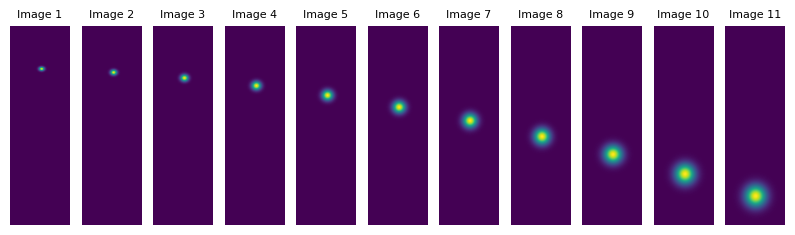

In [172]:
def fit_fun2d(imageData):
    sigma_abs = 29e-13 
    #imageData = load_image(image, resolution_x, resolution_y)
    col_density = -np.log(imageData ) / sigma_abs
    true_val = col_density.ravel()
    ny,nx = col_density.shape
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)
    coordinates = np.vstack([X.ravel(), Y.ravel()])


    A_guess = (np.max(true_val) - np.min(true_val) )
    x0_guess = np.argmax(np.sum(col_density, axis =0))
    y0_guess = np.argmax(np.sum(col_density, axis =1))
    sigmax_guess = nx/10
    sigmay_guess = ny/10
    offset_guess = np.min(true_val)

    initial_guess = [A_guess, x0_guess,y0_guess, sigmax_guess, sigmay_guess, offset_guess]

    popt,pcov = curve_fit(gaussian_2d, coordinates,true_val, p0 = initial_guess )
    return popt

def gaussian_2d(coords, A, x0, y0, sigma_x, sigma_y, offset):
    x,y = coords
        
    exp_term = np.exp(-(((x-x0)**2) / (2 * sigma_x**2) + ((y-y0)**2) / (2 * sigma_y**2)))
  
    return (A * exp_term + offset)


im_data = []  

for i in range(1, 12):
    t = f'A_Thermal_{i}.bin'  
    data = load_image(t, resolution_x, resolution_y) 
    im_data.append(data) 
optvar2d = []
for im in im_data:
    pot = fit_fun2d(im)
    optvar2d.append(pot)


print(optvar2d)

fit_image = []
for param in optvar2d:
    image = gaussian_2d(coordinates, *param).reshape(ny, nx)
    fit_image.append(image)
    
fig, axes = plt.subplots(1, 11, figsize=(10, 10)) 

for i, (ax, im) in enumerate(zip(axes, fit_image)):  
    ax.imshow(im)  
    ax.axis('off') 
    ax.set_title(f"Image {i+1}", fontsize=8)

plt.show() 

In [ ]:
im_data = []  

for i in range(1, 12):
    t = f'A_Thermal_{i}.bin'  
    data = load_image(t, resolution_x, resolution_y) 
    im_data.append(data) 
    
optvar2d = []
for im in im_data:
    pot = fit_fun2d(im)
    optvar2d.append(pot)


print(optvar2d)



In [ ]:
fit_image = []
for param in optvar2d:
    image = gaussian_2d(coordinates, *param).reshape(ny, nx)
    fit_image.append(image)
    
fig, axes = plt.subplots(1, 11, figsize=(10, 10)) 

for i, (ax, im) in enumerate(zip(axes, fit_image)):  
    ax.imshow(im)  
    ax.axis('off') 
    ax.set_title(f"Image {i+1}", fontsize=8)

plt.show() 